<a href="https://colab.research.google.com/github/iamhimanshugulati/Covid19-Germany-Data-Analysis/blob/main/Covid_Germany_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 "Germany" Country Data Analysis

### This NoteBook starts with exploratory data analysis for the country Germany. The data contains various features regarding the COVID -19 outbreak.

## Objectives:
1) To get data understanding.

2) Clean data as required.

3) Perform EDA (Exploratory Data Analysis), to get better understanding.

4) Modeling the data with help of feature selection technique.

## Index 

1) Data Cleaning 

2) EDA 

3) Modeling and Feature Selection


## Source of Data
The source of data is www.ourworldindata.org

In [ ]:
# Importing required libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore") 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading CSV File
df_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/linear-comprehensive-covid-data.csv")
pd.set_option('display.max_columns', None)

#### The above file contain Covid-19 Data, with respect to all Countries, so we're obtaing data with respect to "Germany" Country as we're dealng with same only.

In [ ]:
# Filtering to Germany
grouplocation=df_data.groupby(df_data.location)
df_germany=grouplocation.get_group("Germany")

print("The Shape of the data frame is ",df_germany.shape)
print("The Columns of the data frame are ",df_germany.columns)
df_germany.head(10)

The Shape of the data frame is  (413, 59)
The Columns of the data frame are  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_v

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
26027,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,0.012,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26028,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,0.048,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26029,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,0.048,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26030,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,0.048,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26031,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,0.060,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26032,DEU,Europe,Germany,2020-02-01,8.0,3.0,1.143,NaN,NaN,0.0,0.095,0.036,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26033,DEU,Europe,Germany,2020-02-02,10.0,2.0,1.429,NaN,NaN,0.0,0.119,0.024,0.017,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.727,1.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26034,DEU,Europe,Germany,2020-02-03,12.0,2.0,1.571,NaN,NaN,0.0,0.143,0.024,0.019,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26035,DEU,Europe,Germany,2020-02-04,12.0,0.0,1.143,NaN,NaN,0.0,0.143,0.000,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
26036,DEU,Europe,Germany,2020-02-05,12.0,0.0,1.143,NaN,NaN,0.0,0.143,0.000,0.014,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 1) Data Cleaning

In [ ]:
# Getting data-type
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 26027 to 26439
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               413 non-null    object 
 1   continent                              413 non-null    object 
 2   location                               413 non-null    object 
 3   date                                   413 non-null    object 
 4   total_cases                            413 non-null    float64
 5   new_cases                              413 non-null    float64
 6   new_cases_smoothed                     408 non-null    float64
 7   total_deaths                           371 non-null    float64
 8   new_deaths                             371 non-null    float64
 9   new_deaths_smoothed                    408 non-null    float64
 10  total_cases_per_million                413 non-null    float64
 11  

In [ ]:
#Counting number of null values
df_germany.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              42
new_deaths                                42
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  42
new_deaths_per_million                    42
new_deaths_smoothed_per_million            5
reproduction_rate                         36
icu_patients                              92
icu_patients_per_million                  92
hosp_patients                            413
hosp_patients_per_million                413
weekly_icu_admissions                    413
weekly_icu

In [ ]:
# shape and columns of filtered dataset
print("The shape of the data frame is", (df_germany.shape))
print("The columns of the data frame are" , (df_germany.columns))

The shape of the data frame is (413, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vac

In [ ]:
#counting number of null values
df_germany.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              42
new_deaths                                42
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  42
new_deaths_per_million                    42
new_deaths_smoothed_per_million            5
reproduction_rate                         36
icu_patients                              92
icu_patients_per_million                  92
hosp_patients                            413
hosp_patients_per_million                413
weekly_icu_admissions                    413
weekly_icu

In [ ]:
pd.unique(df_germany['tests_units'])
# tests_units has uniques value

array([nan, 'tests performed'], dtype=object)

### Removing unnecessary columns & columns which have more than 70% missing value.

In [ ]:
#Removing unnecessary columns
df_germany.drop(columns=['hosp_patients', 'hosp_patients_per_million','weekly_icu_admissions', 'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand','tests_per_case','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','extreme_poverty','handwashing_facilities','tests_units'], axis =1 ,inplace =True)

In [ ]:
# Getting number of columns
df_germany.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

### Information >>>> Stringency Index - How ban implemented scaled to a value from 0 to 100 (100 = strictest).

### Handling Missing Values by checking skewness

In [ ]:
# Checking skewness
df_germany_univar=df_germany.loc[:,'total_cases':'stringency_index']
df_germany_univar=df_germany_univar.select_dtypes([np.int, np.float])
for i, col in enumerate(df_germany_univar.columns):
    print("\nSkewness of "+col +" is", df_germany_univar[col].skew()) #measures skewness


Skewness of total_cases is 1.1923324655360932

Skewness of new_cases is 1.8786343774613092

Skewness of new_cases_smoothed is 1.0564450358443491

Skewness of total_deaths is 1.5138058497686644

Skewness of new_deaths is 1.9829937840727867

Skewness of new_deaths_smoothed is 1.418365416211031

Skewness of total_cases_per_million is 1.1923324599242013

Skewness of new_cases_per_million is 1.8786337364225303

Skewness of new_cases_smoothed_per_million is 1.0564452638543758

Skewness of total_deaths_per_million is 1.5138059358862688

Skewness of new_deaths_per_million is 1.9830040233157544

Skewness of new_deaths_smoothed_per_million is 1.418356131954678

Skewness of reproduction_rate is 2.647988173690016

Skewness of icu_patients is 0.7499753731440375

Skewness of icu_patients_per_million is 0.7499756736127057

Skewness of new_tests_smoothed is -0.02119122733405388

Skewness of new_tests_smoothed_per_thousand is -0.02117675692808966

Skewness of positive_rate is 0.4999131857611585

Skewn

In [ ]:
#Counting number of null values
df_germany.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          0
new_cases                            0
new_cases_smoothed                   5
total_deaths                        42
new_deaths                          42
new_deaths_smoothed                  5
total_cases_per_million              0
new_cases_per_million                0
new_cases_smoothed_per_million       5
total_deaths_per_million            42
new_deaths_per_million              42
new_deaths_smoothed_per_million      5
reproduction_rate                   36
icu_patients                        92
icu_patients_per_million            92
new_tests_smoothed                  62
new_tests_smoothed_per_thousand     62
positive_rate                      361
stringency_index                     1
population                           0
population_density                   0
median_age               

### Replacing Null Values with median(Positive Skewed), mean(Uniform Distribution) and mean(Negative Skewed) as per graph and skewness data.

In [ ]:
df_germany['total_deaths']=df_germany['total_deaths'].fillna(df_germany['total_deaths'].median())
df_germany['new_deaths']=df_germany['new_deaths'].fillna(df_germany['new_deaths'].median())
df_germany['new_cases_smoothed_per_million']=df_germany['new_cases_smoothed_per_million'].fillna(df_germany['new_cases_smoothed_per_million'].median())
df_germany['total_deaths_per_million']=df_germany['total_deaths_per_million'].fillna(df_germany['total_deaths_per_million'].median())
df_germany['new_deaths_per_million']=df_germany['new_deaths_per_million'].fillna(df_germany['new_deaths_per_million'].median())
df_germany['new_deaths_smoothed_per_million']=df_germany['new_deaths_smoothed_per_million'].fillna(df_germany['new_deaths_smoothed_per_million'].median())
df_germany['reproduction_rate']=df_germany['reproduction_rate'].fillna(df_germany['reproduction_rate'].median())
df_germany['icu_patients']=df_germany['icu_patients'].fillna(df_germany['icu_patients'].median())
df_germany['icu_patients_per_million']=df_germany['icu_patients_per_million'].fillna(df_germany['icu_patients_per_million'].median())
df_germany['new_tests_smoothed']=df_germany['new_tests_smoothed'].fillna(df_germany['new_tests_smoothed'].mean())
df_germany['new_tests_smoothed_per_thousand']=df_germany['new_tests_smoothed_per_thousand'].fillna(df_germany['new_tests_smoothed_per_thousand'].mean())
df_germany['stringency_index']=df_germany['stringency_index'].fillna(df_germany['stringency_index'].mean())
df_germany['new_cases_smoothed']=df_germany['new_cases_smoothed'].fillna(df_germany['new_cases_smoothed'].median())
df_germany['new_deaths_smoothed']=df_germany['new_deaths_smoothed'].fillna(df_germany['new_deaths_smoothed'].median())
df_germany['positive_rate']=df_germany['positive_rate'].fillna(df_germany['positive_rate'].mean())

In [ ]:
#counting number of null values
df_germany.isnull().sum().sum()

0

### Data Cleaning Part is done, now data is cleaned.

## 2) EDA

### Understanding Data by performing Univariate Analysis

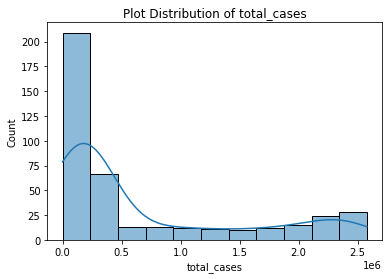

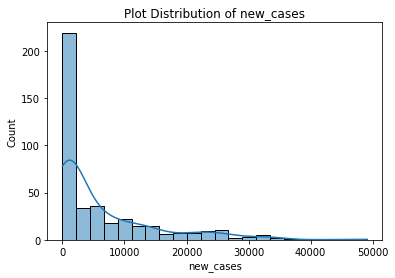

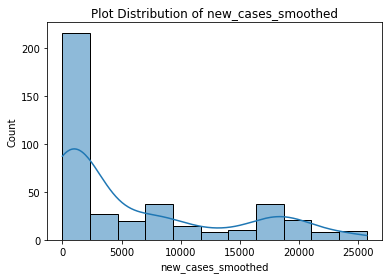

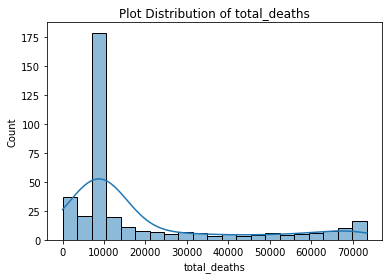

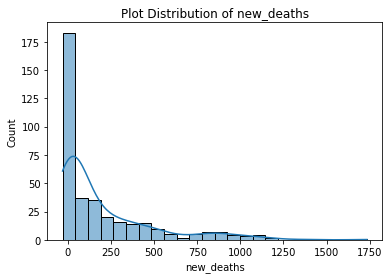

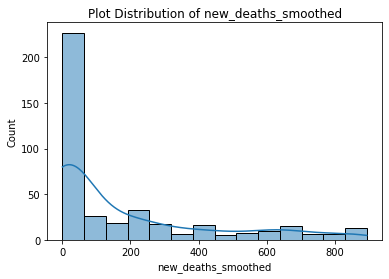

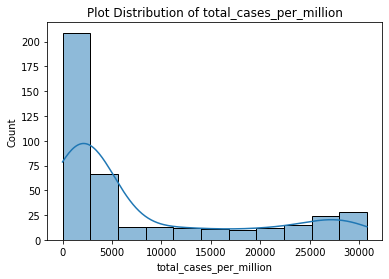

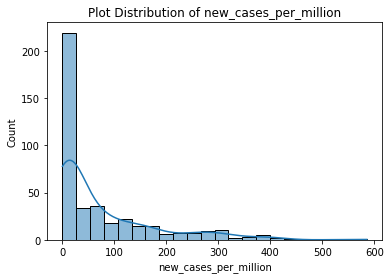

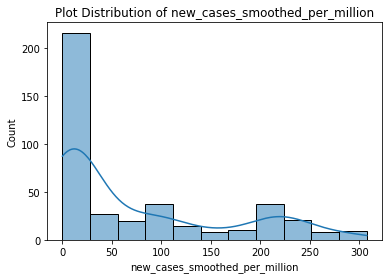

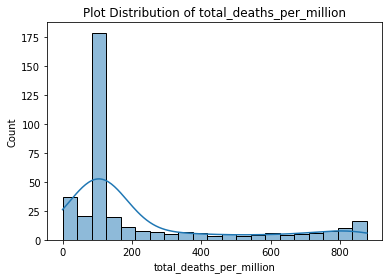

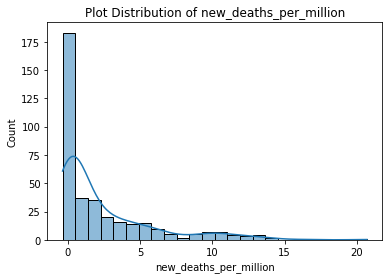

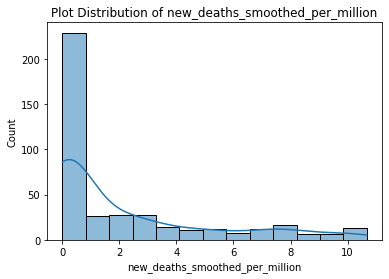

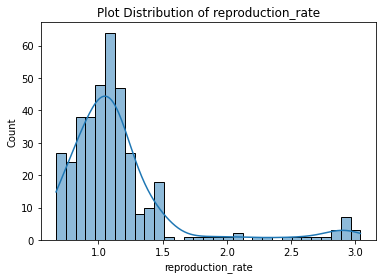

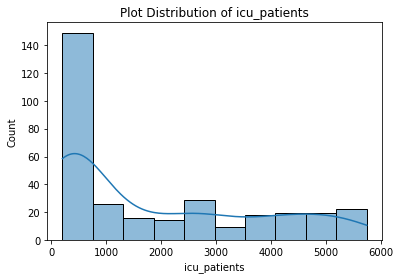

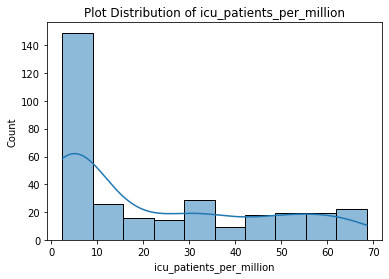

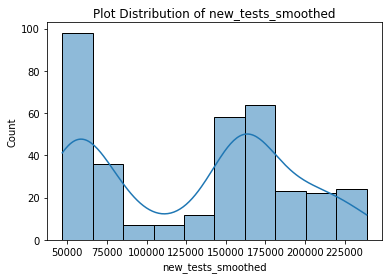

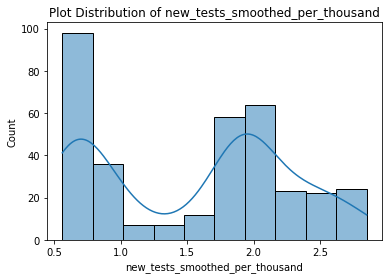

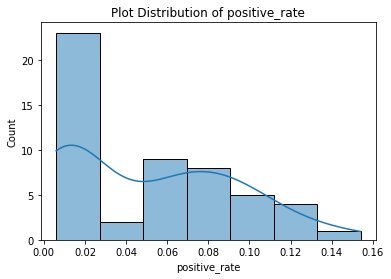

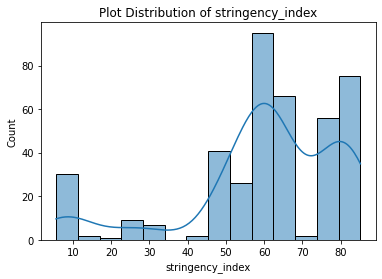

In [ ]:
for i, col in enumerate(df_germany_univar.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_germany_univar,kde=True).set_title("Plot Distribution of "+col)

### From Above distribution we can say that data is not equally distributed.

### Now getting month feature to perform EDA part and coverting date to datetime

In [ ]:
df_germany['date'] = pd.to_datetime(df_germany['date'])

df_germany['month'] = df_germany['date'].dt.month_name()
df_germany['year'] = df_germany['date'].dt.year
df_germany['month'] = df_germany['month'] + df_germany['year'].astype(str)

df_germany.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year
26027,DEU,Europe,Germany,2020-01-27,1.0,1.0,1874.4285,9345.0,49.0,37.214,0.012,0.012,22.372,111.537,0.585,0.444,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,January2020,2020
26028,DEU,Europe,Germany,2020-01-28,4.0,3.0,1874.4285,9345.0,49.0,37.214,0.048,0.036,22.372,111.537,0.585,0.444,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,January2020,2020
26029,DEU,Europe,Germany,2020-01-29,4.0,0.0,1874.4285,9345.0,49.0,37.214,0.048,0.000,22.372,111.537,0.585,0.444,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,January2020,2020
26030,DEU,Europe,Germany,2020-01-30,4.0,0.0,1874.4285,9345.0,49.0,37.214,0.048,0.000,22.372,111.537,0.585,0.444,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,January2020,2020
26031,DEU,Europe,Germany,2020-01-31,5.0,1.0,1874.4285,9345.0,49.0,37.214,0.060,0.012,22.372,111.537,0.585,0.444,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,January2020,2020
26032,DEU,Europe,Germany,2020-02-01,8.0,3.0,1.1430,9345.0,49.0,0.000,0.095,0.036,0.014,111.537,0.585,0.000,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,February2020,2020
26033,DEU,Europe,Germany,2020-02-02,10.0,2.0,1.4290,9345.0,49.0,0.000,0.119,0.024,0.017,111.537,0.585,0.000,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,February2020,2020
26034,DEU,Europe,Germany,2020-02-03,12.0,2.0,1.5710,9345.0,49.0,0.000,0.143,0.024,0.019,111.537,0.585,0.000,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,February2020,2020
26035,DEU,Europe,Germany,2020-02-04,12.0,0.0,1.1430,9345.0,49.0,0.000,0.143,0.000,0.014,111.537,0.585,0.000,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,February2020,2020
26036,DEU,Europe,Germany,2020-02-05,12.0,0.0,1.1430,9345.0,49.0,0.000,0.143,0.000,0.014,111.537,0.585,0.000,1.07,971.0,11.589,129564.125356,1.546422,0.051365,5.56,83783945.0,237.016,46.6,21.453,15.957,45229.245,156.139,8.31,28.2,33.1,8.0,81.33,0.947,February2020,2020


### Getting Statistical data with pandas predefined function.

In [ ]:
df_germany.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,year
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0,4.130000e+02,413.0,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,413.0,4.130000e+02,4.130000e+02,413.000000
mean,6.797313e+05,6244.169492,6190.348638,18384.808717,182.859564,177.18108,8112.906896,74.527046,73.884668,219.431174,2.182545,2.114768,1.144358,1683.089588,20.088383,129564.125356,1.546422,0.051365,60.473471,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522924e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2020.176755
std,8.182060e+05,8605.289408,7380.867753,19962.195957,280.367304,246.64209,9765.665151,102.708083,88.094060,238.258001,3.346293,2.943808,0.430834,1650.324535,19.697437,56195.335639,0.670714,0.014555,20.128814,0.0,2.077301e-12,0.0,1.458379e-13,1.049322e-13,2.258283e-10,1.109791e-12,4.624129e-14,1.244958e-13,2.347635e-13,0.0,8.679135e-13,2.445453e-15,0.381924
min,1.000000e+00,0.000000,0.000000,2.000000,-31.000000,0.00000,0.012000,0.000000,0.000000,0.024000,-0.370000,0.000000,0.670000,200.000000,2.387000,46828.000000,0.559000,0.006000,5.560000,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522925e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2020.000000
25%,1.713240e+05,535.000000,565.571000,8895.000000,10.000000,5.28600,2044.831000,6.385000,6.750000,106.166000,0.119000,0.063000,0.950000,359.000000,4.285000,71643.000000,0.855000,0.051365,55.090000,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522925e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2020.000000
50%,2.312920e+05,1842.000000,1874.428500,9345.000000,49.000000,37.21400,2760.577000,21.985000,22.372000,111.537000,0.585000,0.444000,1.070000,971.000000,11.589000,129564.125356,1.546422,0.051365,62.040000,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522925e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2020.000000
75%,1.094678e+06,9197.000000,9861.000000,17177.000000,250.000000,248.42900,13065.486000,109.770000,117.696000,205.015000,2.984000,2.965000,1.190000,2654.000000,31.677000,166494.000000,1.987000,0.051365,76.850000,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522925e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2020.000000
max,2.578842e+06,49044.000000,25757.000000,73463.000000,1734.000000,894.42900,30779.668000,585.363000,307.422000,876.815000,20.696000,10.675000,3.040000,5745.000000,68.569000,238862.000000,2.851000,0.154000,85.190000,83783945.0,2.370160e+02,46.6,2.145300e+01,1.595700e+01,4.522925e+04,1.561390e+02,8.310000e+00,2.820000e+01,3.310000e+01,8.0,8.133000e+01,9.470000e-01,2021.000000


### Performing Bivariate Analysis getting relationship with respect to time.

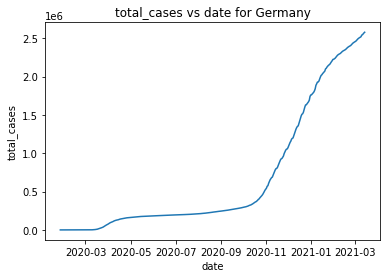

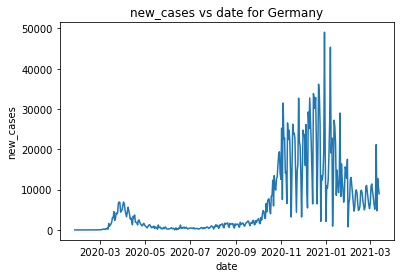

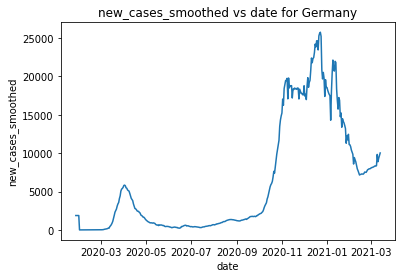

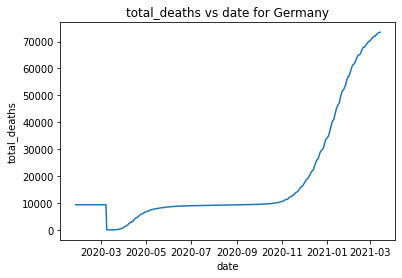

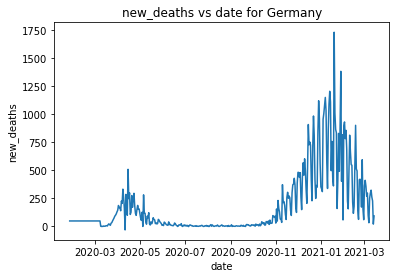

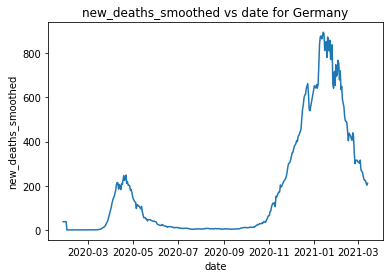

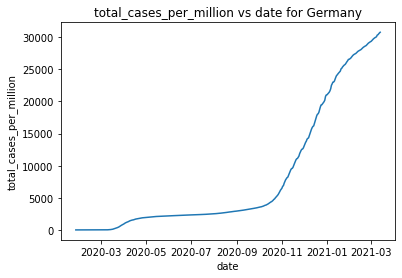

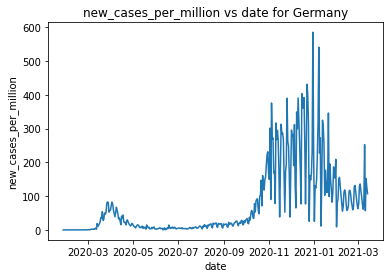

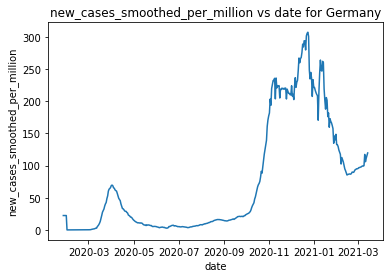

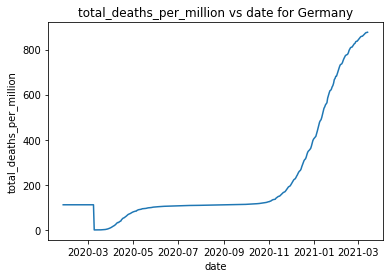

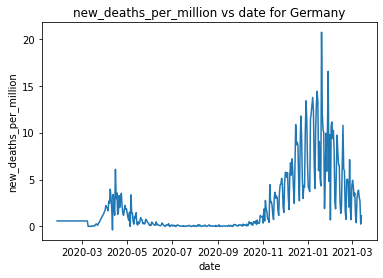

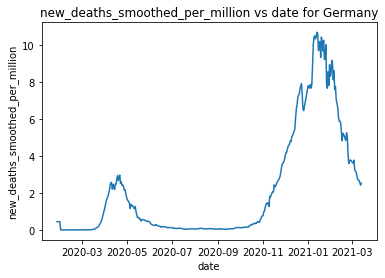

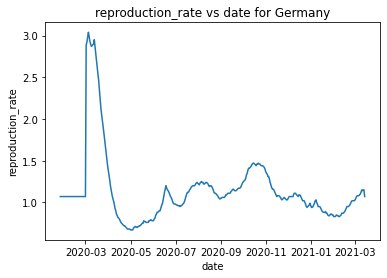

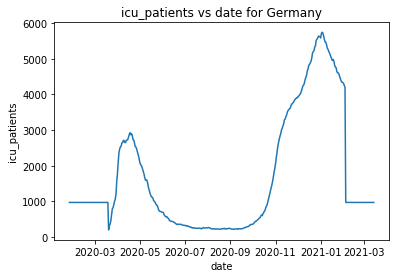

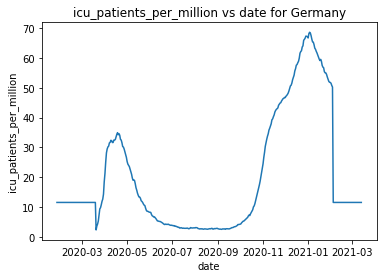

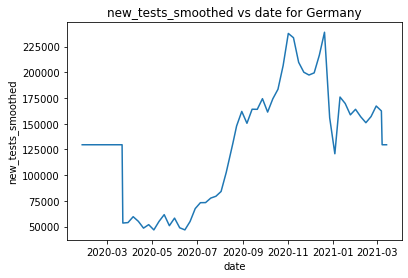

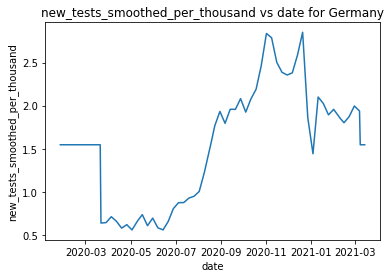

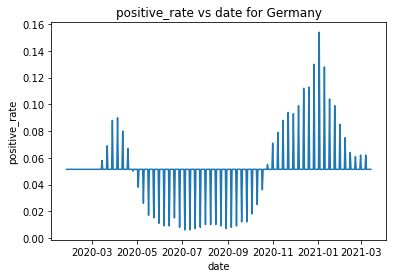

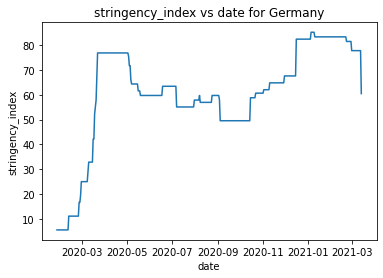

In [ ]:
df_germany_bivar=df_germany.loc[:,'date':'stringency_index']
for i, feature in enumerate(df_germany_bivar.columns[1:]):
    plt.figure(i)
    g = sns.lineplot(x=df_germany_bivar.date,y=feature,data=df_germany_bivar).set_title(feature +" vs date for Germany")

### We can observe that total_cases & total_deaths has an exponential graph.

## Some Results regarding No. of Recovered, Active & bed at Hospital 

### Number of Cases Recovered

In [ ]:
df_germany['recovered_cases'] = df_germany['total_cases']-df_germany['total_deaths'] - df_germany['new_cases']

### Number of availabale Bed at Hospital

In [ ]:
df_germany['total_beds_available'] = (df_germany['population']/1000)*df_germany['hospital_beds_per_thousand']

### Number of Active Cases

In [ ]:
df_germany['active_case'] = df_germany['total_cases'] - df_germany['recovered_cases'] - df_germany['new_deaths']

## Checking Correlation with Specific features Only

,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,positive_rate,stringency_index,reproduction_rate
total_cases,1.000000,0.550045,0.958579,0.702146,0.463893,0.221102,0.616135,-0.264877
new_cases,0.550045,1.000000,0.360298,0.679499,0.611740,0.124529,0.436325,-0.081904
total_deaths,0.958579,0.360298,1.000000,0.586439,0.344655,0.153176,0.492608,-0.261681
new_deaths,0.702146,0.679499,0.586439,1.000000,0.336519,0.118500,0.516189,-0.242297
new_tests_smoothed,0.463893,0.611740,0.344655,0.336519,1.000000,0.166077,0.025449,0.137452
positive_rate,0.221102,0.124529,0.153176,0.118500,0.166077,1.000000,0.150551,-0.005087
stringency_index,0.616135,0.436325,0.492608,0.516189,0.025449,0.150551,1.000000,-0.343391
reproduction_rate,-0.264877,-0.081904,-0.261681,-0.242297,0.137452,-0.005087,-0.343391,1.000000


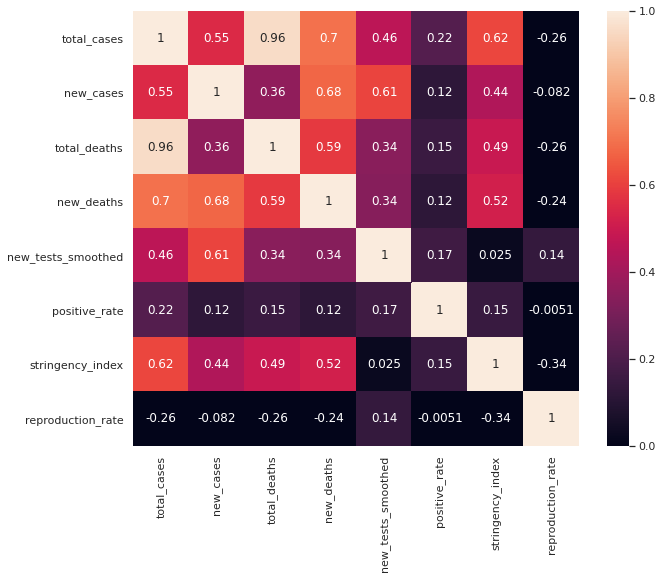

In [ ]:
#### Plotting Heat map to check Correlation
df_germany_corr=df_germany[['total_cases', 'new_cases','total_deaths', 'new_deaths', 'new_tests_smoothed', 'positive_rate', 'stringency_index', 'reproduction_rate']].corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_germany_corr, vmin=0, vmax=1,annot=True)
df_germany_corr

## From above data we can say that Independent variabels are new_deaths 'stringency_index', 'positive_rate','reproduction_rate.

#### Now Checking Starting Date, Ending Date & Number of days data available.

In [ ]:
print("Starting date-",df_germany['date'].min())
print("End date-",df_germany['date'].max())
print("Length of data with respect to days:",(df_germany['date'].max() - df_germany['date'].min()))

Starting date- 2020-01-27 00:00:00
End date- 2021-03-14 00:00:00
Length of data with respect to days: 412 days 00:00:00


### For better understanding grouping data on Month Basis and Visualizing that data in bar & line graph.

In [ ]:
df_grouped=df_germany.groupby(df_germany.month).sum()
new_order=['January2020','February2020', 'March2020', 'April2020','May2020','June2020','July2020',  'August2020','September2020','October2020','November2020','December2020','January2021','February2021','March2021']
df_grouped = df_grouped.reindex(new_order, axis=0)
df_grouped = df_grouped.loc[:,:'stringency_index']

#### Firstly plotting with Bar Graph to get status of each month.

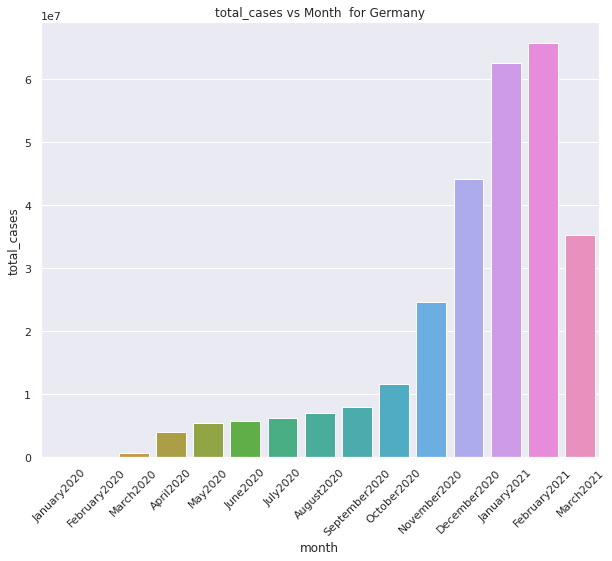

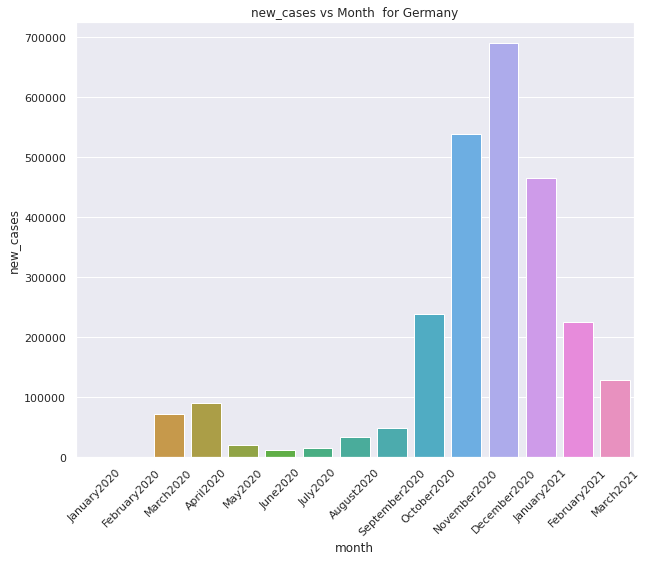

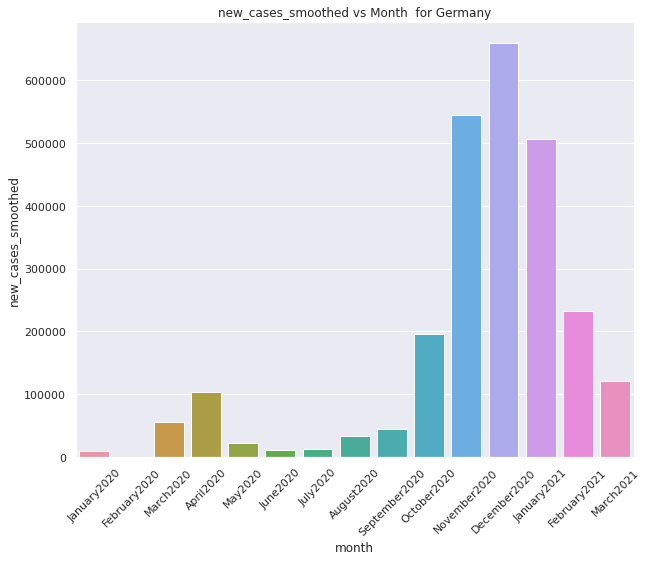

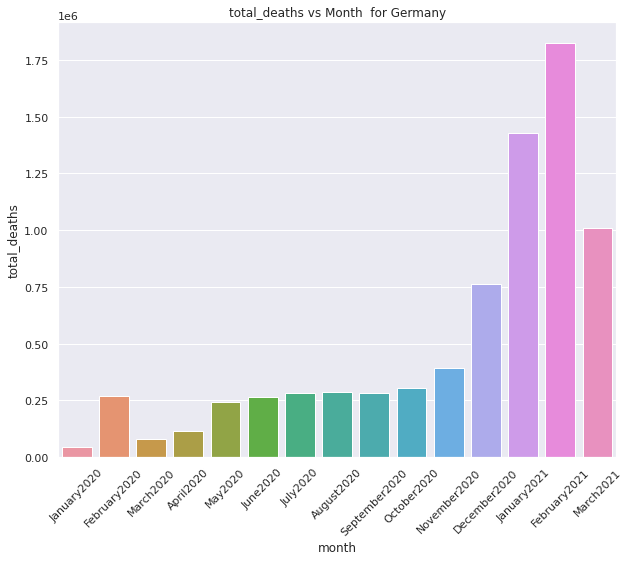

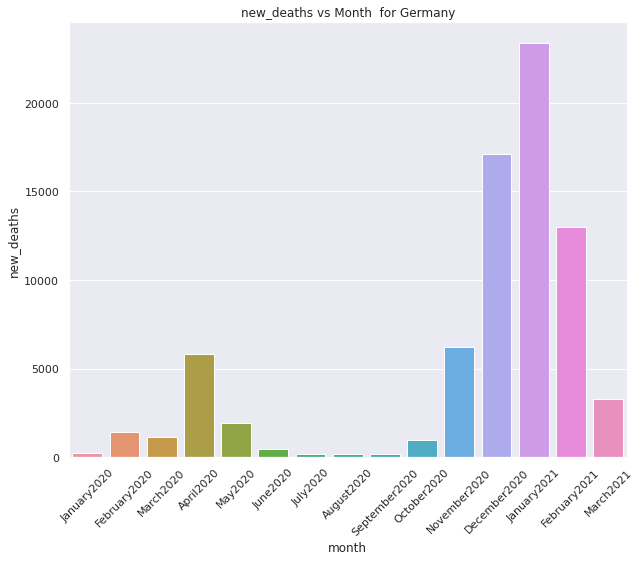

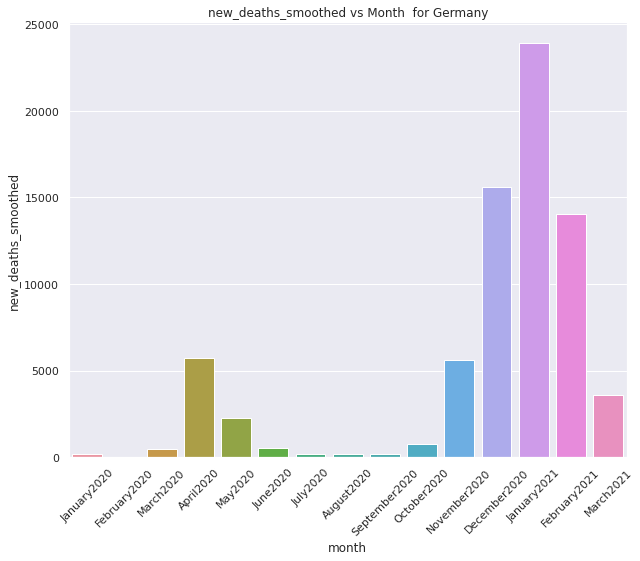

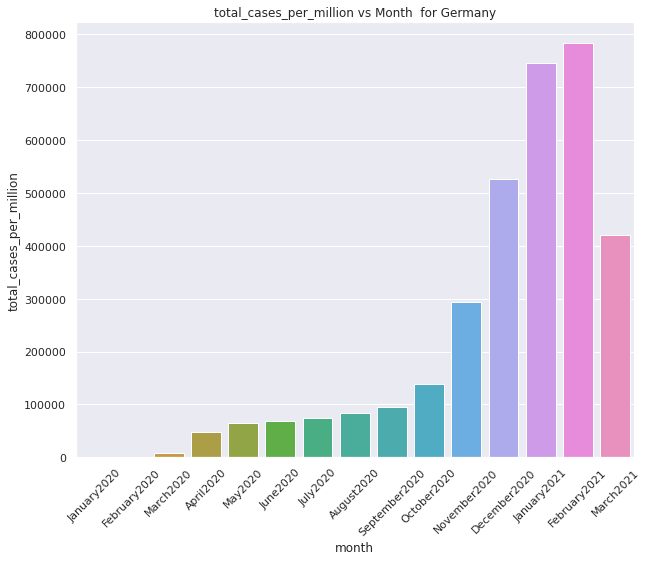

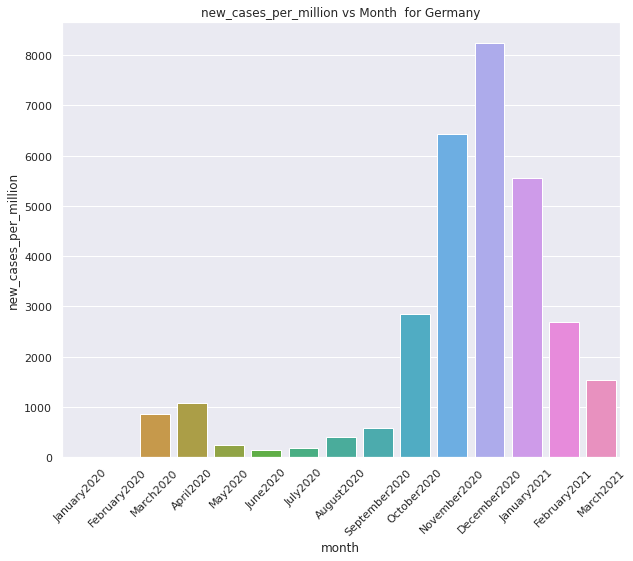

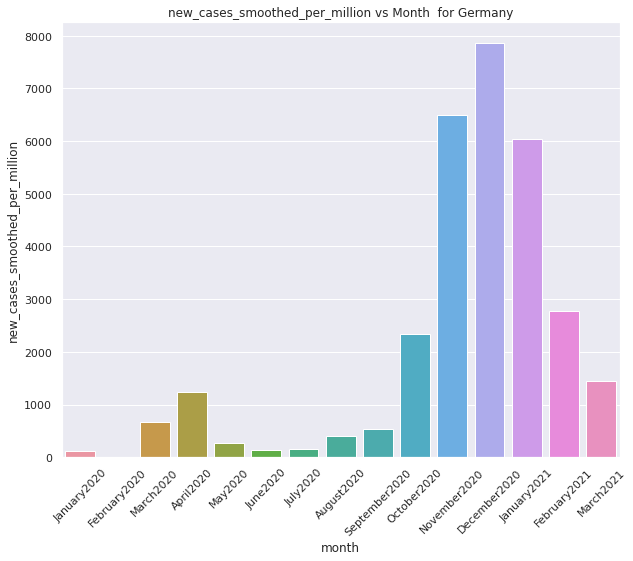

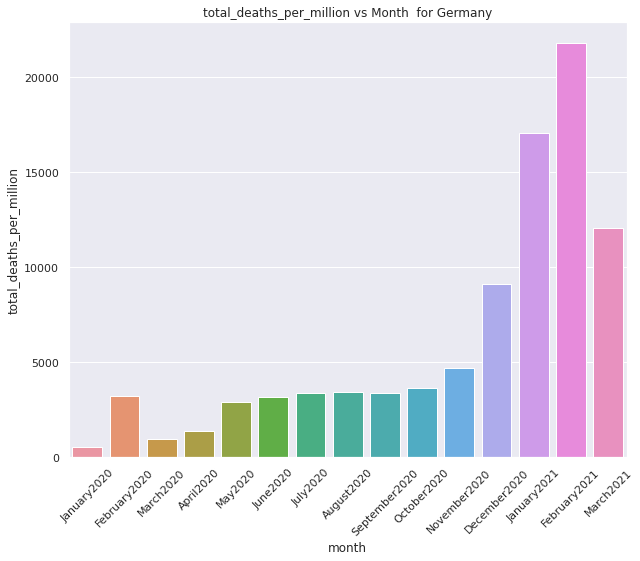

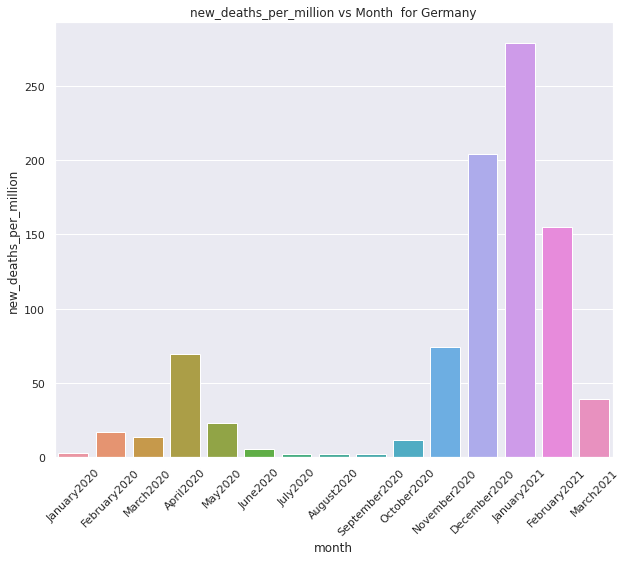

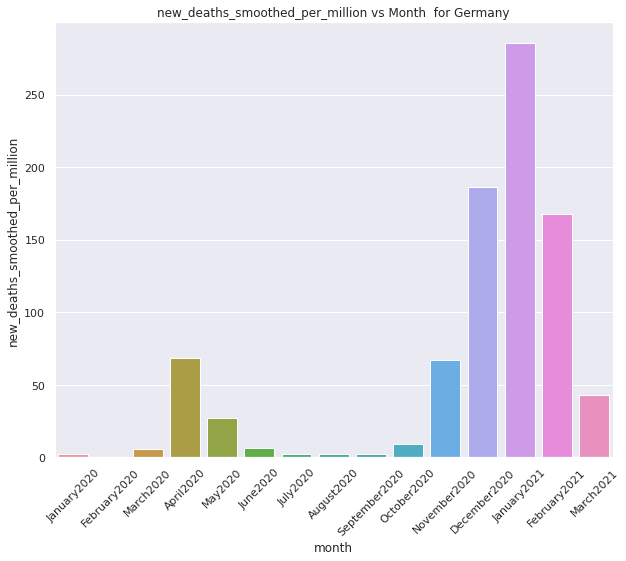

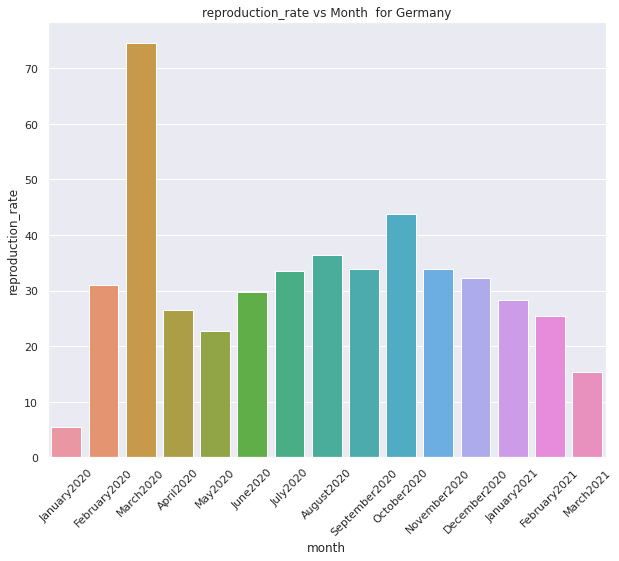

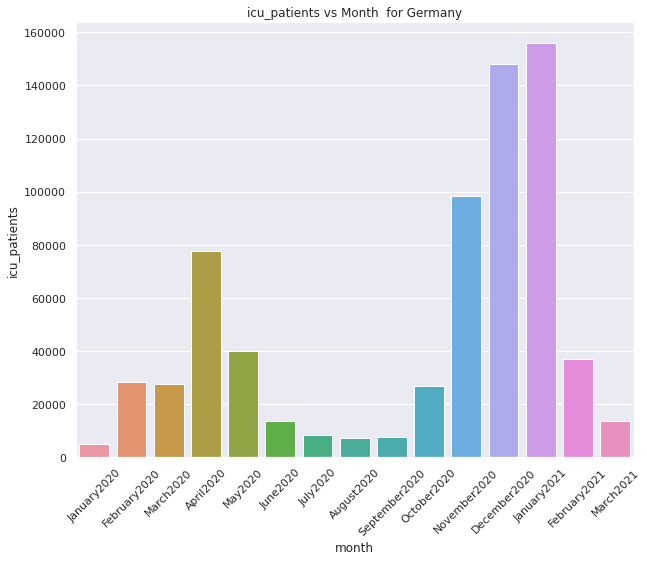

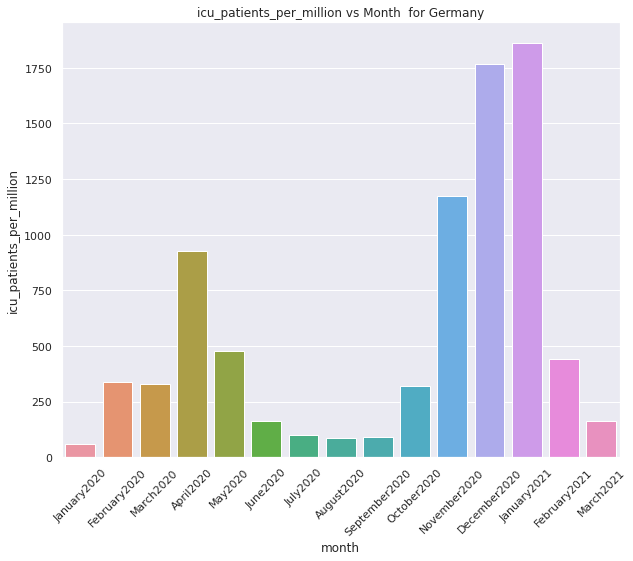

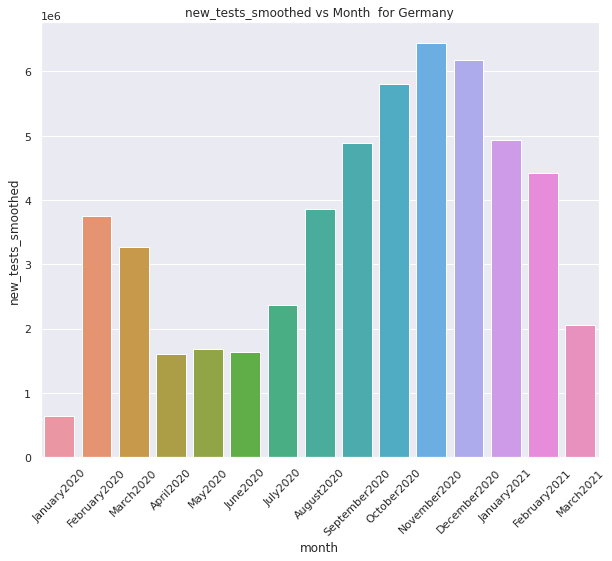

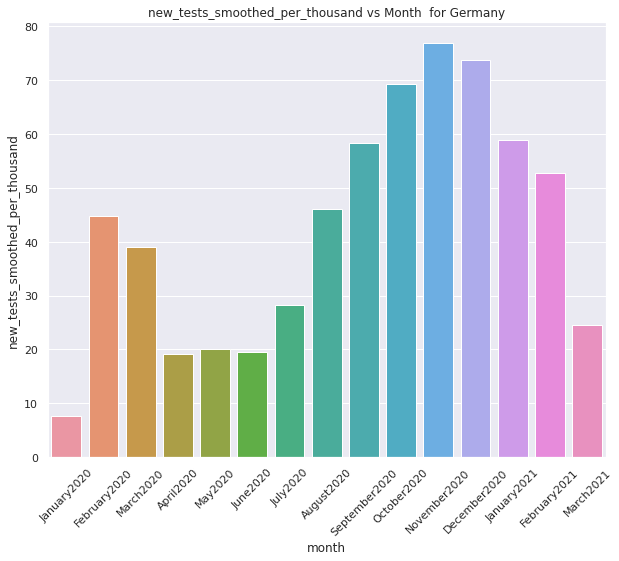

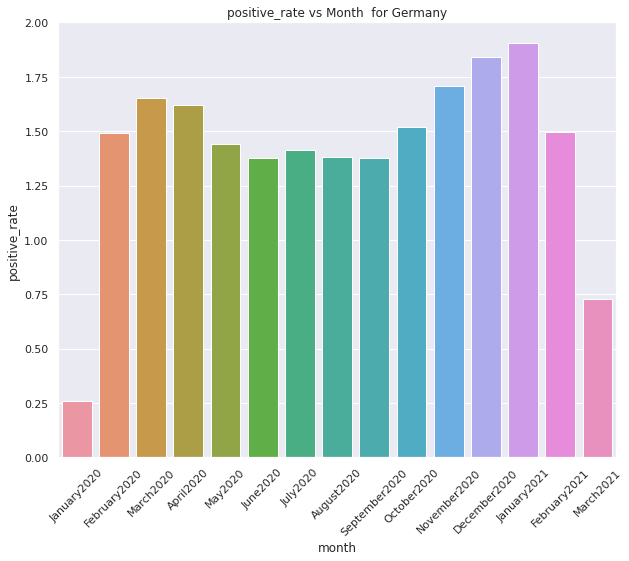

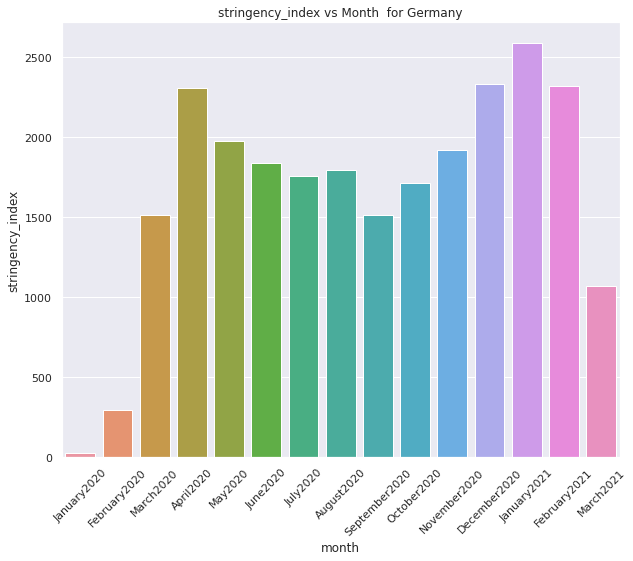

In [ ]:
for i, col in enumerate(df_grouped.columns):
    plt.figure(i)
    md=sns.barplot(x=df_grouped.index,y=col,data=df_grouped,ci=None)
    md.set_xticklabels(df_grouped.index, rotation=45)
    md.set_title(col +" vs Month  for Germany")

#### Now plotting with Line Graph to get graph on trend basis.

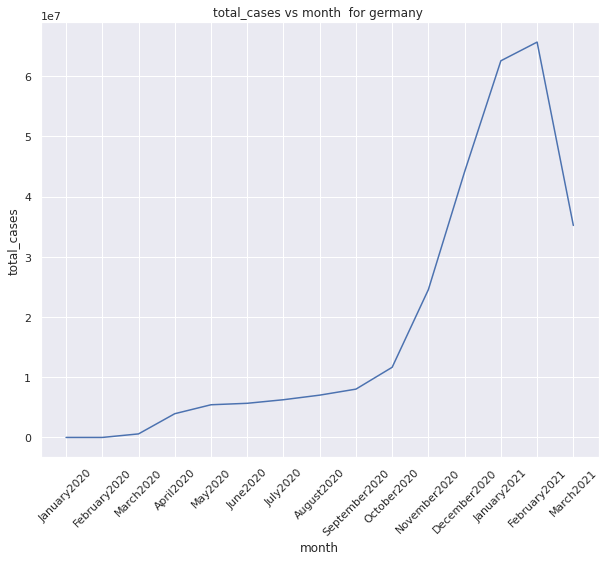

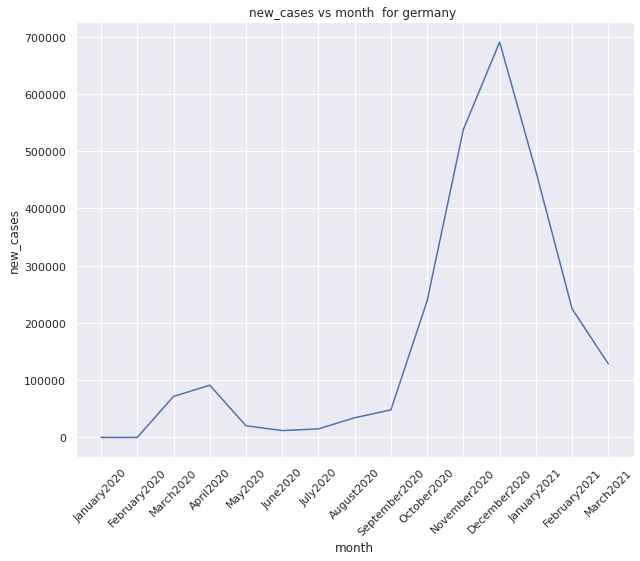

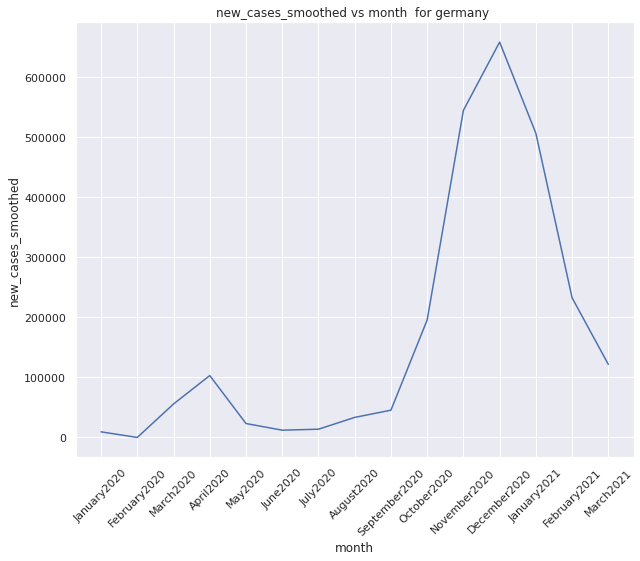

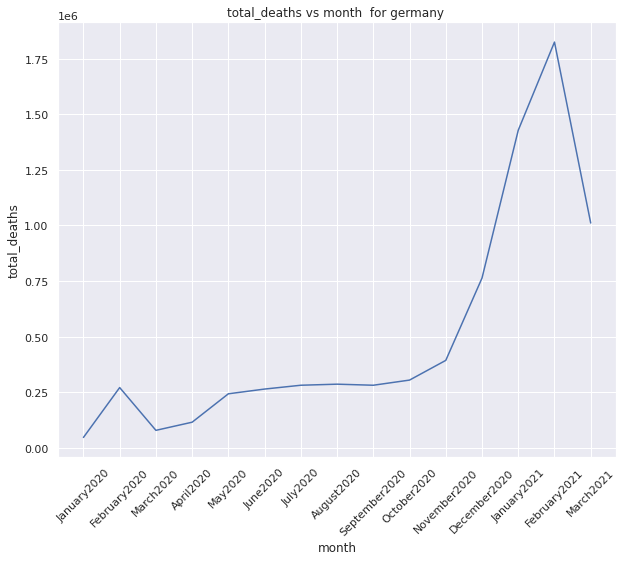

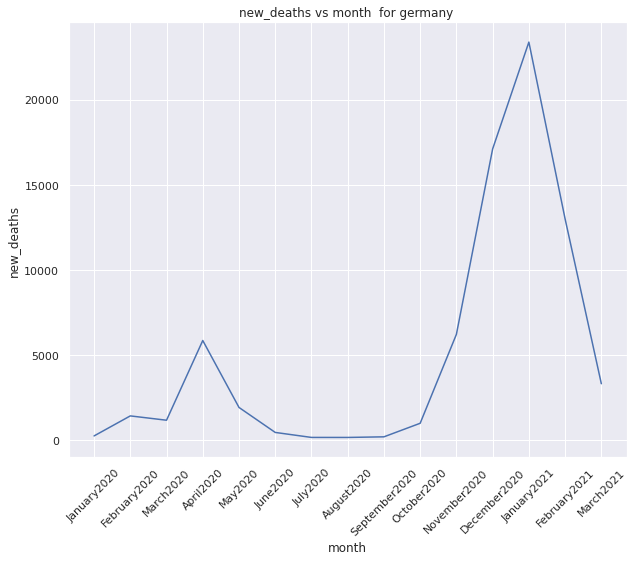

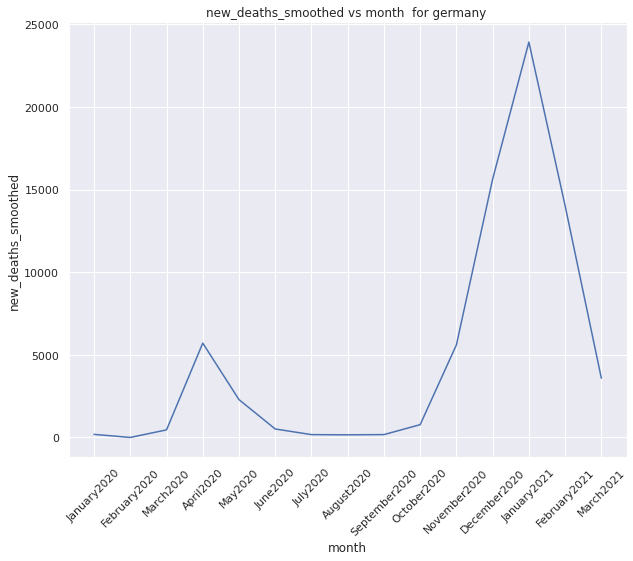

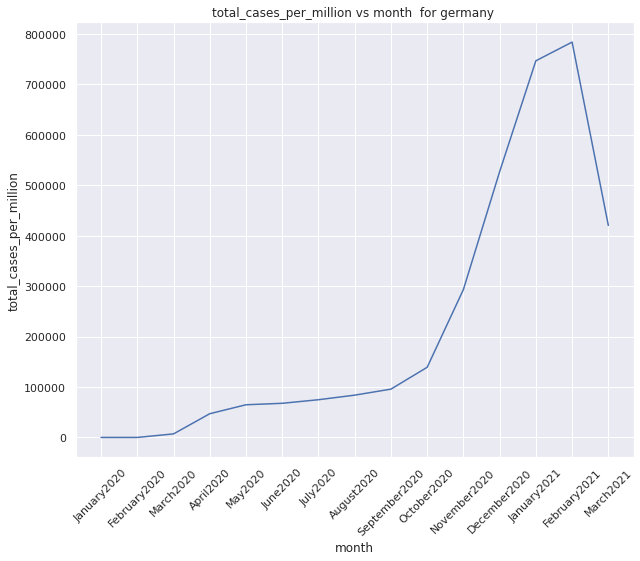

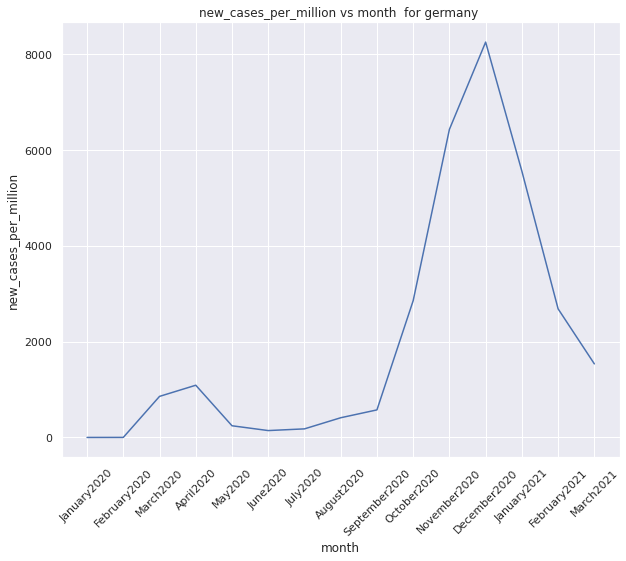

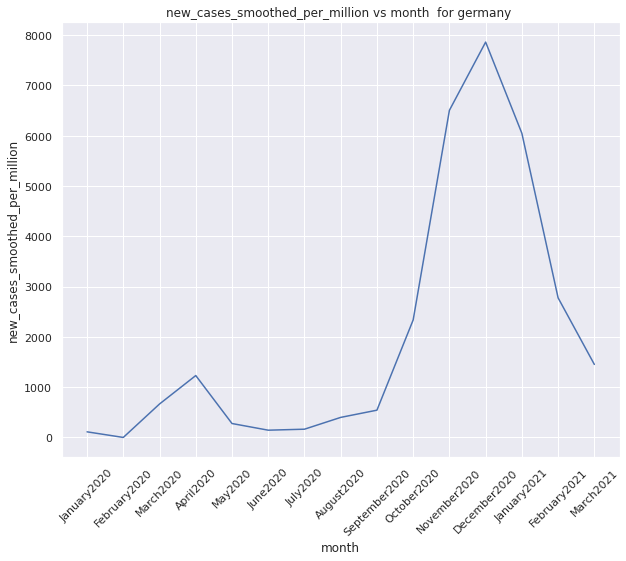

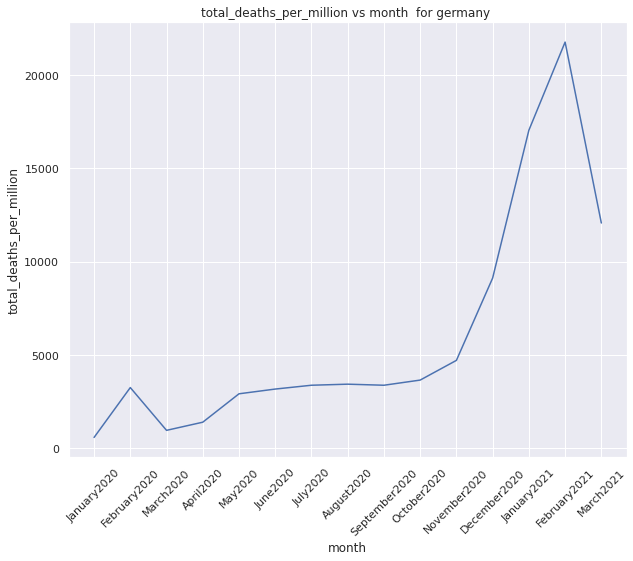

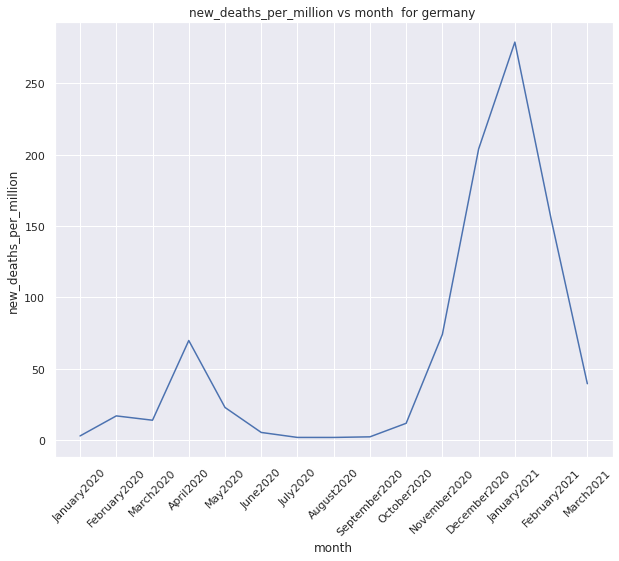

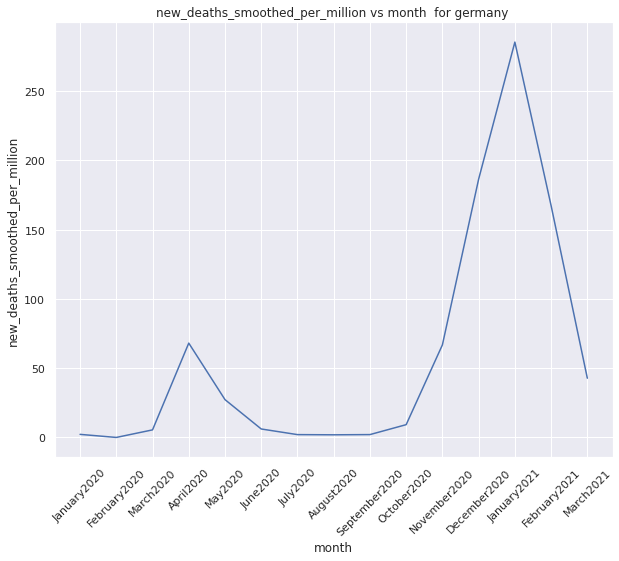

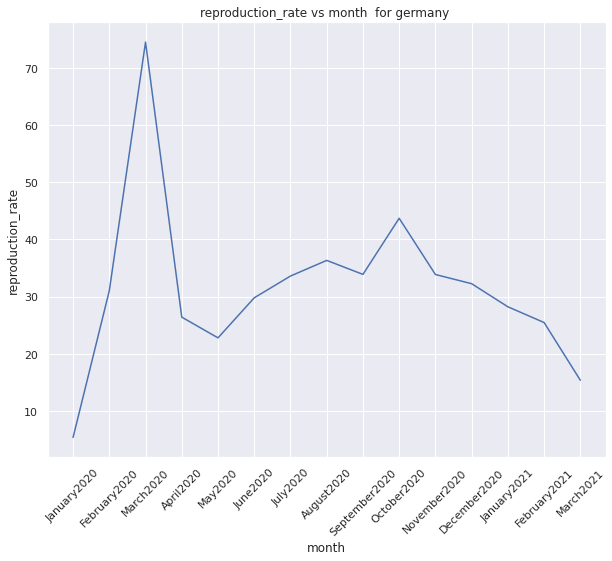

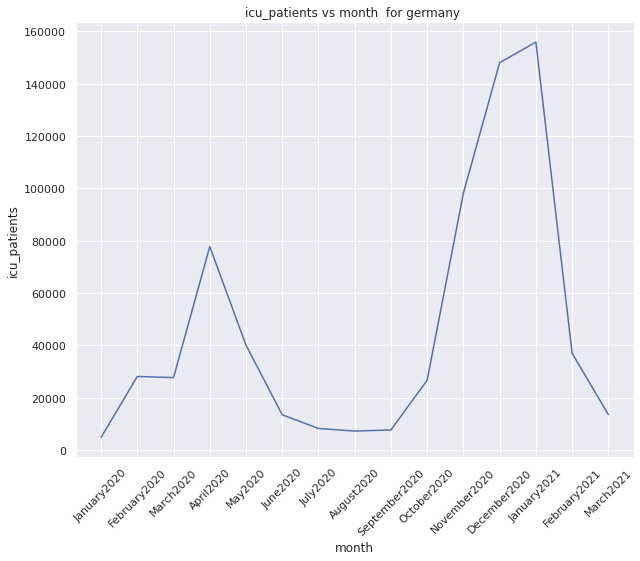

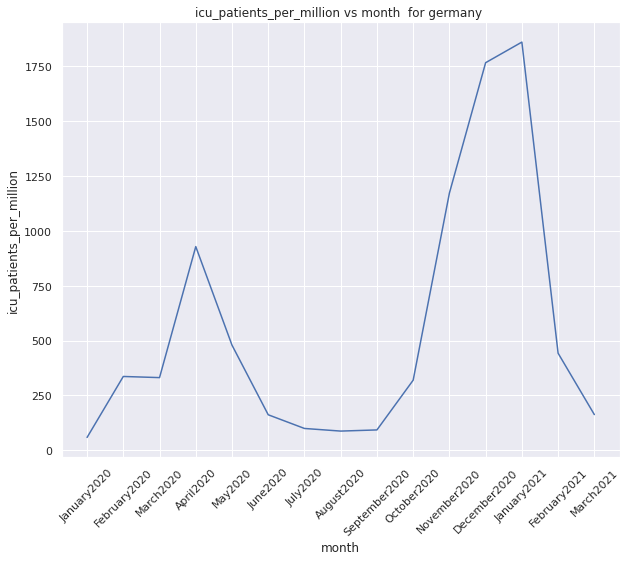

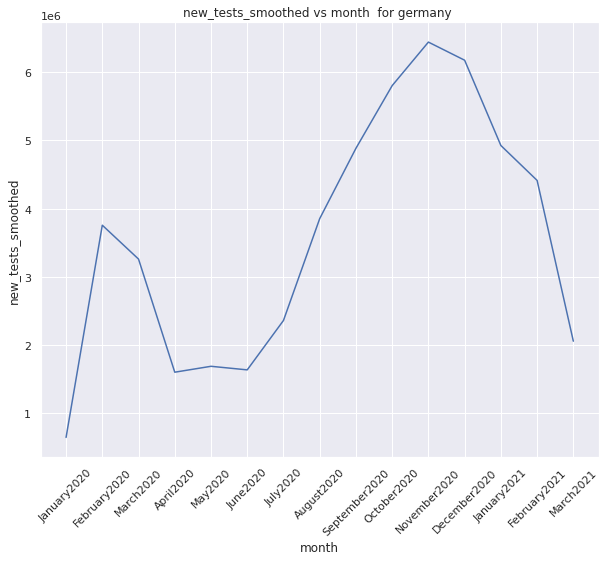

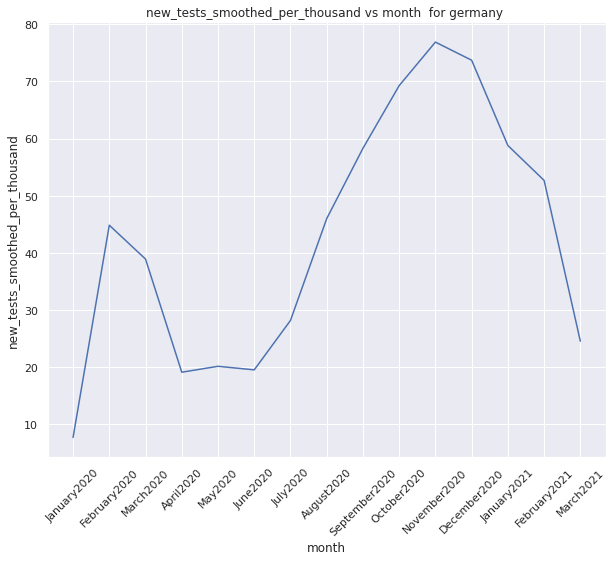

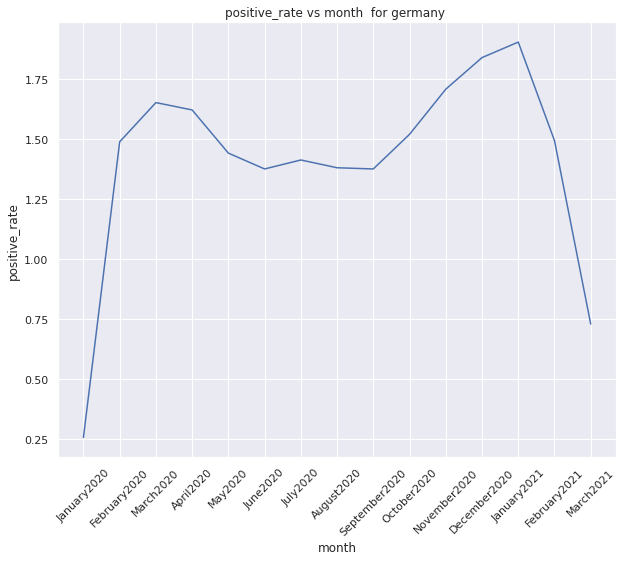

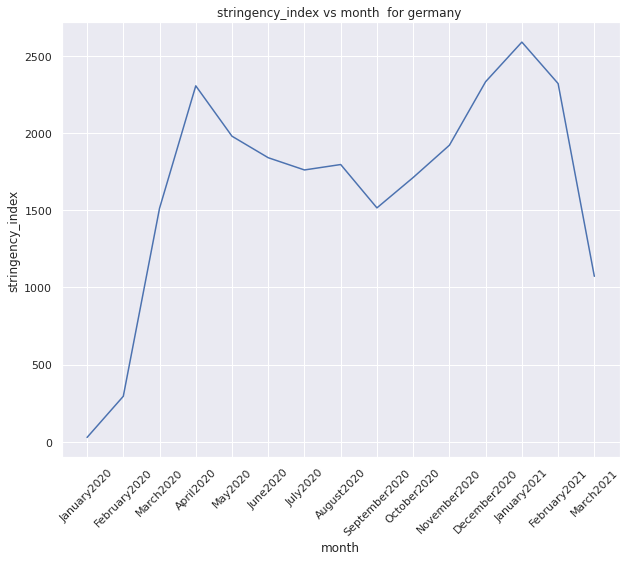

In [ ]:
for i, col in enumerate(df_grouped.columns):
    plt.figure(i)
    lg = sns.lineplot(x=df_grouped.index,y=col,data=df_grouped)
    lg.set_xticklabels(df_grouped.index, rotation=45)
    lg.set_title(col +" vs month  for germany ")

## As our target variable is new_cases, so checking relation of new_case with time wrt other columns.

Text(0.5, 1.0, 'new_deaths vs date with hue as reproduction_rate')

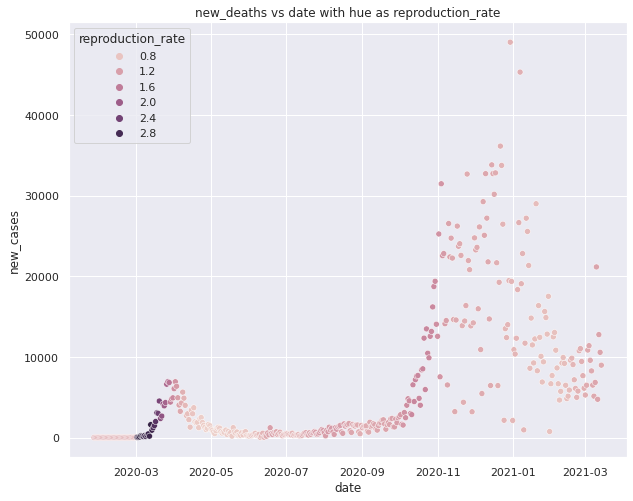

In [ ]:
sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.reproduction_rate).set_title("new_deaths vs date with hue as reproduction_rate")

Text(0.5, 1.0, 'new_cases vs date with hue as positive_rate')

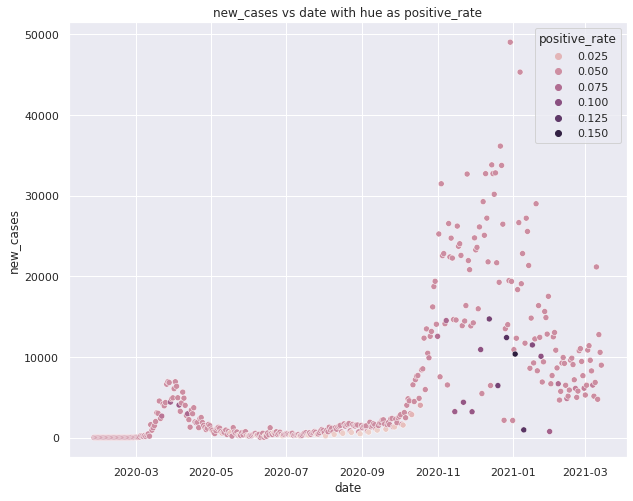

In [ ]:
sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.positive_rate).set_title("new_cases vs date with hue as positive_rate")

Text(0.5, 1.0, 'new_cases vs date with hue as stringency_index')

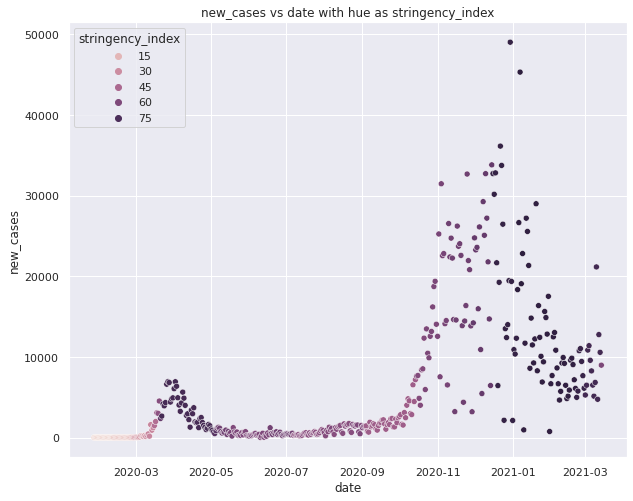

In [ ]:
sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.stringency_index).set_title("new_cases vs date with hue as stringency_index")

### Plotting Line graph between new_deaths, new_cases, total_deaths, total_cases with respect to each day, from this we get to see vaiartion with each others.

Text(0.5, 1.0, 'Variation of total_deaths, new,cases, total_cases and new_deaths with respect each day')

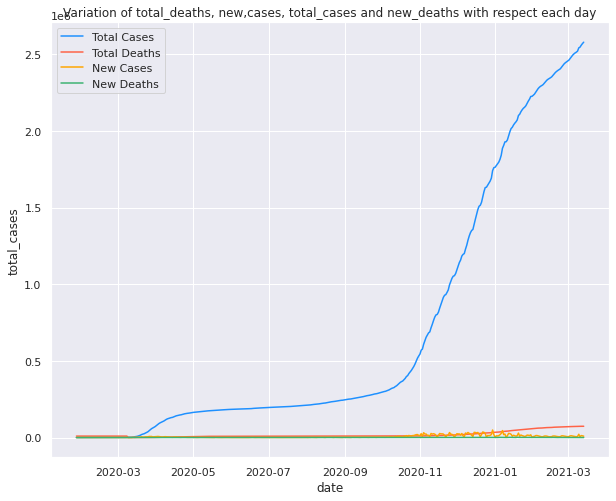

In [ ]:
sns.lineplot(x=df_germany.date,y= df_germany.total_cases, color="DodgerBlue", label="Total Cases", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.total_deaths ,color="tomato", label="Total Deaths", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.new_cases ,color="orange", label="New Cases", linestyle="-")
sns.lineplot(x=df_germany.date ,y= df_germany.new_deaths, color="MediumSeaGreen", label="New Deaths", linestyle="-").set_title("Variation of total_deaths, new,cases, total_cases and new_deaths with respect each day")

### Getting more clear picture.

Text(0.5, 1.0, 'Variation of Deaths, new_cases and new_deaths with respect each day')

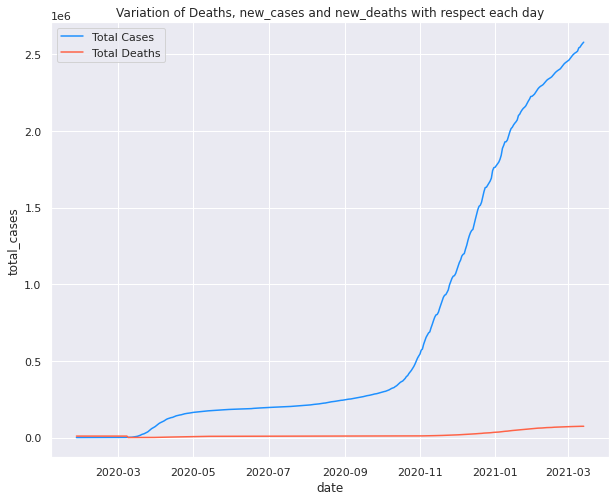

In [ ]:
sns.lineplot(x=df_germany.date,y= df_germany.total_cases, color="DodgerBlue", label="Total Cases", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.total_deaths ,color="tomato", label="Total Deaths", linestyle="-").set_title("Variation of Deaths, new_cases and new_deaths with respect each day")

### As we can notice in above graph, increase in total case leads to increase in total deaths too.

## 3) Modeling and Feature Selection

### Taking cube root of data to reduce outliers

In [ ]:
df_germany[['new_cases','new_deaths','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_cases_per_million','new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','stringency_index']] = np.cbrt(df_germany[['new_cases','new_deaths','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_cases_per_million','new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','stringency_index']])

### positive_rate is higly skewed and has high outliers, so doing log transformtion.

In [ ]:
df_germany['positive_rate'] = np.log(df_germany['positive_rate'])

## Normalizing the data using minmax scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_germany.loc[:,'total_cases':"stringency_index"] = scaler.fit_transform(df_germany.loc[:,'total_cases':"stringency_index"])
df_germany[['recovered_cases']] = scaler.fit_transform(df_germany[['recovered_cases']])

### Based on the above graphs the following features have been chosen for traning

In [ ]:
from sklearn.model_selection import train_test_split
X = df_germany[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y= df_germany['new_cases']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Training set size:', X_train.shape, Y_train.shape)
print('Test set size:', X_test.shape, Y_test.shape)

Training set size: (289, 7) (289,)
Test set size: (124, 7) (124,)


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Fitting the model on the train dataset
regr.fit (X_train, Y_train)

# Predicting for the X_test points
pxpoint =regr.predict(X_test)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Train Data Score",regr.score(X_train,Y_train))
print("Test Data Score",regr.score(X_test,Y_test))

Y_test = np.asanyarray(Y_test)

from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint,Y_test) )

Coefficients:  [ 35.60733497  -1.06386599   0.09809401   0.09180546   0.42666872
 -34.58090475   0.22204721]
Intercept:  -0.09721577509164242
Train Data Score 0.9532283240036759
Test Data Score 0.9568328447093911
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96


### Now Grouping data in 2 Sets, basically on month basis.

In [ ]:
df_grouping1 = df_germany[ (df_germany['month'] != 'October2020' ) & ( df_germany['month'] != 'November2020' ) & ( df_germany['month'] != 'December2020' )]
print(df_grouping1.shape)
df_grouping2 =df_germany[(df_germany['month'] == 'October2020' ) | ( df_germany['month'] == 'November2020' ) | ( df_germany['month'] == 'December2020' )]
print(df_grouping2.shape)

(321, 41)
(92, 41)


In [ ]:
from sklearn.model_selection import train_test_split
X1 = df_grouping1[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y1= df_grouping1['new_cases']

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, Y1)
print("Train Data Score:",regr1.score(X1,Y1))

x = np.array(df_grouping2[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']])
pxpoint2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouping2['new_cases'])
print("Regression Score of 3 months:",regr1.score(x,y_test2))

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint2 ,y_test2))

Train Data Score: 0.9411693585606207
Regression Score of 3 months: 0.8261626209645649
Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.90


Text(0, 0.5, 'new_cases')

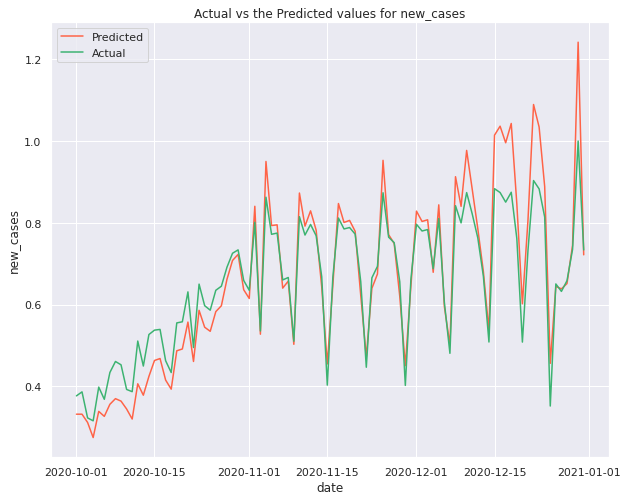

In [ ]:
ax=sns.lineplot(x= df_grouping2.date, y=pxpoint2, color="tomato", label="Predicted")
ax=sns.lineplot(x= df_grouping2.date, y=y_test2, color="MediumSeaGreen", label="Actual")
ax.set_title("Actual vs the Predicted values for new_cases")
ax.set_xlabel('date')
ax.set_ylabel('new_cases')

## Evaluating the model using K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pxpoint2 = cross_val_predict( regr,X_test,Y_test, cv= cv)
print(pxpoint2)
Rc=cross_val_score( regr,X_test,Y_test, cv=10)
print('Accuracy: %.3f (%.3f)' % (np.mean(Rc), np.std(Rc)))

[ 0.29687366  0.06189049  0.2886608   0.47250244  0.25821928  0.29710471
  0.34834414  0.75373676  0.2393171   0.36403521  0.67531506  0.24591346
  0.34318418  0.23394576  0.40996337  0.2596734   0.4631434   0.19151626
  0.31725073  0.31705249  0.52859489  0.93271518 -0.02420856  0.3997452
 -0.0304834   0.36318809  0.2011298   0.5907721   0.57555569  0.70249653
  0.35568788  0.05936361  0.23702916  0.27898382  0.62910315  0.33908648
  0.40986701  0.29293477  0.2860894  -0.02886904  0.59252482  0.37808386
  0.33399539  0.77083104  0.55915139  0.24271212  0.37823631  0.73674878
  0.62276028  0.26838756  0.62762306  0.87406798  0.96378729  0.68506153
  0.99394069  0.32652511  0.42953153  0.72722264  0.57649108  0.5651556
  0.32241667  0.35623267  0.29063743  0.23987264  0.31588439  0.06274074
  0.19311405  0.28595741  0.3725028   0.52647165  0.32649972  0.70196218
  0.43483463  0.58602222  0.30616815  0.77158253  1.00935849  0.53268901
  0.3206743   0.27150499  0.68361303  0.59067046  0.3

## The SIR Epidemic Model

### A simple mathematical description of the spread of a disease in a population is the so-called SIR model,which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

### S(t) are those susceptible but not yet infected with the disease.
### I(t) is the number of infectious individuals
### R(t) are those individuals who have recovered from the disease and now have immunity to it.

### Model - Susceptible > Infected > Removed

### The model is started with a single infected individual on day 0: I(0)=1( from data set)
### S, I and R represent the number of susceptible,infected,and recovered individuals, and N = S + I + R is the total population.

In [ ]:
# Total population, N.
N=df_germany["population"].mean()

#beta-the transmission rate constant.(reproduction_rate from data set)
#expected amount of people  an infected person infect perday
beta=df_germany['reproduction_rate'].mean()

D=14        #D= no of days an infected person has and can spread the disease(like 14-21days)

#gamma-removal rate(the proportion of infected removed per day)
gamma=1/D
print(beta)

0.20015120401303632


In [ ]:
from scipy.integrate import odeint

In [ ]:
# The SIR model differential equations.
def deriv(x, t,beta, gamma):
    s,i,r =x
    dsdt= -(beta * s * i)/N
    didt=(beta *s *i)/N - gamma * i
    drdt=gamma * i
    return [dsdt,didt,drdt]

In [ ]:
#initial condition
i0 = 1                                   #new_cases on first day of our dataset 
r0 = 0                                   #R0 : The total number of people an infected person infects (R0 = β/γ)
s0=N -i0 - r0                            # Everyone else,S0,is susceptible to infection initially.

In [ ]:
# A grid of time points (in days)
t=np.linspace(0,200,200)
x0=s0,i0,r0

In [ ]:
# Integrate the SIR equations over the time grid, t.
soln = odeint(deriv, x0, t, args=(beta,gamma))
s,i,r=soln.T

Text(0, 0.5, 'Fraction')

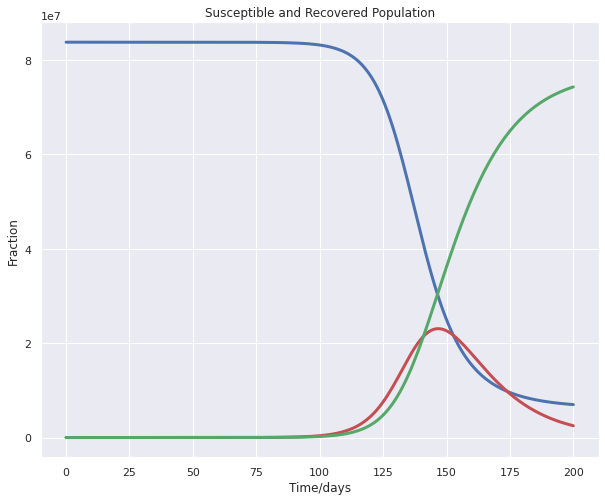

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(t, s, 'b' ,lw=3, label='Fraction susceptible')
ax.plot(t, i, 'r' ,lw=3, label='Fraction infected')
ax.plot(t, r, 'g' ,lw=3, label='Recovered with immunity')
ax.set_title('Susceptible and Recovered Population')
ax.set_xlabel('Time/days')
ax.set_ylabel('Fraction')

The number of infected cases increases for a certain time period, and then eventually decreases given that individuals recover/decease from the disease.
### The susceptible fraction of population decreases as the virus is transmited, to eventually drop to the absorbent state 0.

### we can bring down the infected population by decreasing the beta value(transmission rate),that is the-expected amount of people an infected person infect perday, susceptible population can decrease by vaccination drive.